# Recortes


## Hipóteses 2: Localização tem relação com o centro

### B : Coreness e GEO



2001 a 2003 e países da África:

In [313]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

import openpyxl

import netpixi
import cpnet

from graph_tool import spectral, centrality
from netpixi.integration.gt import *
from netpixi.integration.gt import Graph
from regression.integration.gt import *

In [314]:
df_completo = pd.read_csv('../Projeto-rascunho/asylum_seekers.csv')
df_completo

/tmp/ipykernel_84/1764240694.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_completo = pd.read_csv('../Projeto-rascunho/asylum_seekers.csv')


,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5.0,0,0
1,2000,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8,0
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186.0,1235,1235
3,2000,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250.0,171,0
4,2000,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273.0,150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129715,2016,United States of America,Zimbabwe,G / IN,232,NaN,229,16,NaN,*,10,28,435,NaN
129716,2016,United States of America,Zimbabwe,G / EO,142,NaN,12,*,NaN,*,23,31,138,NaN
129717,2016,South Africa,Zimbabwe,G / AR,94,9,NaN,NaN,NaN,NaN,94,94,0,NaN
129718,2016,South Africa,Zimbabwe,G / FI,41238,4124,7964,73,NaN,7869,NaN,7942,41260,NaN


In [315]:
df_aresta = df_completo.loc[:, ['Country / territory of asylum/residence', 'Origin', 'decisions_recognized', 'Rejected', 'Year']]
df_aresta = df_aresta.rename(columns={'Origin': 'origin', 'Country / territory of asylum/residence': 'destiny', 'decisions_recognized': 'value', 'Rejected': 'rejected','Year' : 'year'})
df_aresta

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5,0,2000
1,South Africa,Afghanistan,0,0,2000
2,Uzbekistan,Afghanistan,747,112,2000
3,United States of America,Afghanistan,151,31,2000
4,United States of America,Afghanistan,182,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16,*,2016
129716,United States of America,Zimbabwe,*,*,2016
129717,South Africa,Zimbabwe,NaN,NaN,2016
129718,South Africa,Zimbabwe,73,7869,2016


In [316]:
df_aresta.value = pd.to_numeric(df_aresta['value'], errors = 'coerce').fillna(0)
df_aresta

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5.0,0,2000
1,South Africa,Afghanistan,0.0,0,2000
2,Uzbekistan,Afghanistan,747.0,112,2000
3,United States of America,Afghanistan,151.0,31,2000
4,United States of America,Afghanistan,182.0,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16.0,*,2016
129716,United States of America,Zimbabwe,0.0,*,2016
129717,South Africa,Zimbabwe,0.0,NaN,2016
129718,South Africa,Zimbabwe,73.0,7869,2016


In [317]:
df_aresta_2001_2003 = df_aresta[((df_aresta['year'] == 2001) | (df_aresta['year'] == 2002) | (df_aresta['year'] == 2003))]
df_aresta_2001_2003

,destiny,origin,value,rejected,year
5153,South Africa,Afghanistan,0.0,0,2001
5154,South Africa,Afghanistan,5.0,2,2001
5155,Uzbekistan,Afghanistan,1573.0,247,2001
5156,United States of America,Afghanistan,129.0,27,2001
5157,United States of America,Afghanistan,212.0,43,2001
...,...,...,...,...,...
22911,Ukraine,Zimbabwe,0.0,2,2003
22912,Ukraine,Zimbabwe,0.0,1,2003
22913,United States of America,Zimbabwe,115.0,160,2003
22914,United States of America,Zimbabwe,54.0,72,2003


In [318]:
df_aresta_2001_2003 = df_aresta_2001_2003.drop('year', axis=1)

In [319]:
df_aresta_2001_2003.value = df_aresta_2001_2003['value'].astype(int)
df_aresta_2001_2003.rejected = df_aresta_2001_2003['rejected'].astype(int)

In [320]:
df_aresta_2001_2003.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17763 entries, 5153 to 22915
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   destiny   17763 non-null  object
 1   origin    17763 non-null  object
 2   value     17763 non-null  int64 
 3   rejected  17763 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 693.9+ KB


In [321]:
paises_africa =  pd.read_csv('./african_countries.csv')
lista_paises_africa = paises_africa['Afro_countries'].to_list()
lista_paises_africa

['Algeria',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cameroon',
 'Central African Rep.',
 'Chad',
 'Comoros',
 'Congo',
 "Côte d'Ivoire",
 'Dem. Rep. of the Congo',
 'Djibouti',
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Sao Tome and Principe',
 'Senegal',
 'Seychelles',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Tanzania',
 'Togo',
 'Tunisia',
 'Uganda',
 'Zambia',
 'Zimbabwe']

Tabela filtrada com anos de 2001-2003 e países da África em lista.

Agora vamos calcular o coreness desse ano e depois analisar para a região da África.

In [322]:
listaVertices = []

listaVertices = set(df_completo['Country / territory of asylum/residence'].unique().tolist() + df_completo['Origin'].unique().tolist())

print(len(listaVertices))

225


In [323]:
# Criando um grafo não-dirigido
g = Graph(directed=True) 
g.add_vp('nome')
g.add_ep('aceitos')

In [324]:
for vertice in listaVertices:
    g.add_vertex(vertice)

In [325]:
for v in g.all_vertices():
    v['nome'] = str(v)

In [326]:
n = g.num_vertices()
print('O número de vértices do grafo é :', n)

O número de vértices do grafo é : 225


In [327]:
df_aresta_2001_2003 = df_aresta_2001_2003[df_aresta_2001_2003['origin'] != df_aresta_2001_2003['destiny']]
df_aresta_2001_2003

,destiny,origin,value,rejected
5153,South Africa,Afghanistan,0,0
5154,South Africa,Afghanistan,5,2
5155,Uzbekistan,Afghanistan,1573,247
5156,United States of America,Afghanistan,129,27
5157,United States of America,Afghanistan,212,43
...,...,...,...,...
22911,Ukraine,Zimbabwe,0,2
22912,Ukraine,Zimbabwe,0,1
22913,United States of America,Zimbabwe,115,160
22914,United States of America,Zimbabwe,54,72


In [328]:
df_aresta_2001_2003 = df_aresta_2001_2003.groupby(['origin', 'destiny']).sum().reset_index()
df_aresta_2001_2003

,origin,destiny,value,rejected
0,Afghanistan,Angola,0,2
1,Afghanistan,Argentina,0,0
2,Afghanistan,Armenia,0,4
3,Afghanistan,Australia,2192,757
4,Afghanistan,Austria,1034,811
...,...,...,...,...
5845,Zimbabwe,Switzerland,0,17
5846,Zimbabwe,Thailand,0,0
5847,Zimbabwe,Ukraine,0,3
5848,Zimbabwe,United Kingdom,5490,12256


In [329]:
for index, row in df_aresta_2001_2003.iterrows():
    g.add_edge(row.origin, row.destiny)
    g.get_edge(row.origin, row.destiny)['aceitos'] = row.value

In [330]:
gt_save(g, '/grafo_2001_2003.net.gz')

In [331]:
g = gt_load('/grafo_2001_2003.net.gz')

In [332]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'grafo_2001_2003.net.gz')

In [366]:
#r = netpixi.render('grafo_2001_2003.net.gz', infinite=True);

In [334]:
r.vertex_set_key('nome')

r.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x20B2AA)

In [335]:
r.edge_scale('aceitos', 1, 10)

In [336]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'centralidadeCoreness20012003.net.gz')

In [365]:
#r = netpixi.render('centralidadeCoreness20012003.net.gz')

In [338]:
matrix = spectral.adjacency(g)

# # Além de cpnet.Surprise, há outras
# # opções de algoritmos discretos:
# # cpnet.BE
# # cpnet.Lip
# # cpnet.LapCore
# # cpnet.LapSgnCore
# # cpnet.LowRankCore

algorithm = cpnet.BE()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# # Depois do código acima, c é um dicionário
# # em que as chaves são índices de vértices e
# # valores são os atribuídos pelo algoritmo.

g.add_vp('coreness')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = int(coreness)
    
# # Vamos pintar de vermelho todos os vértices
# # identificados como centro e de verde todos
# # os vértices identificados como periferia.
    
for v in g.all_vertices():
    if v['coreness'] == 1:
        r.vertex(v['id'], color=0xff0000)
    else:
        r.vertex(v['id'], color=0x00ff00)

# # Quando a execução desta célula terminar,
# # veja como ficou a visualização acima.

In [339]:
r.edge_scale('aceitos', 1, 10)

r.vertex_set_key('nome')

r.vertex_scale('coreness', 5, 25)

In [340]:
df_coreness_2001_2003 = gt_data(g).sort_values("coreness", ascending = False)
df_coreness_2001_2003

,nome,coreness
id,,
Greece,Greece,1
Thailand,Thailand,1
Saudi Arabia,Saudi Arabia,1
Ireland,Ireland,1
Egypt,Egypt,1
...,...,...
Turks and Caicos Islands,Turks and Caicos Islands,0
Myanmar,Myanmar,0
Iraq,Iraq,0


In [341]:
data = pd.read_excel('./final_db.xlsx')
data

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


,Unnamed: 0.1,Unnamed: 0,country,idh_2000,idh_2001,idh_2002,idh_2003,idh_2004,idh_2005,idh_2006,...,rejected,betweenness,pop_cont,coreness,in_degree,out_degree,open,coreness_discreto,idh_2008_2012,idh_2001_2003
0,0,0,"China, Hong Kong SAR",0.830,0.838,0.845,0.854,0.865,0.874,0.886,...,7767,2.861034e-04,0,0.240278,830,16,9.654531,0,0.9050,0.845667
1,1,1,"China, Macao SAR",0.922,0.922,0.922,0.922,0.922,0.922,0.922,...,7,8.704008e-07,0,0.098611,10,3,58.823529,0,0.9220,0.922000
2,2,2,Afghanistan,0.350,0.353,0.384,0.393,0.409,0.418,0.429,...,243,2.351135e-03,0,0.120833,249,239198,50.609756,0,0.4690,0.376667
3,3,3,Albania,0.671,0.678,0.684,0.691,0.696,0.706,0.713,...,64,1.306107e-03,0,0.218056,158,14660,71.171171,0,0.7490,0.684333
4,4,4,Algeria,0.637,0.647,0.657,0.667,0.677,0.685,0.690,...,5511,5.926680e-03,0,0.222222,404,6174,6.830093,0,0.7180,0.657000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,220,Wallis and Futuna Islands,0.763,0.763,0.763,0.763,0.763,0.763,0.763,...,0,0.000000e+00,0,0.045833,0,0,0.000000,0,0.7630,0.763000
221,221,221,Western Sahara,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0.000000e+00,0,0.004167,0,473,0.000000,0,0.0000,0.000000
222,222,222,Yemen,0.444,0.453,0.461,0.470,0.477,0.483,0.488,...,5730,5.728203e-03,0,0.194444,11977,10037,67.639916,0,0.5026,0.461333
223,223,223,Zambia,0.425,0.432,0.441,0.451,0.460,0.471,0.482,...,2454,9.805704e-04,0,0.166667,8280,295,77.138066,0,0.5260,0.441333


In [342]:
data_neighboors_countries = data.loc[:, ['n_neightbours', 'country']]

data_neighboors_countries = data_neighboors_countries.rename(columns={'n_neightbours': 'n_neightbours', 'country': 'origin'})

df_coreness_2001_2003 = df_coreness_2001_2003.rename(columns={'nome': 'origin'})
df_coreness_2001_2003

,origin,coreness
id,,
Greece,Greece,1
Thailand,Thailand,1
Saudi Arabia,Saudi Arabia,1
Ireland,Ireland,1
Egypt,Egypt,1
...,...,...
Turks and Caicos Islands,Turks and Caicos Islands,0
Myanmar,Myanmar,0
Iraq,Iraq,0


In [343]:
df_coreness_2001_2003 = df_coreness_2001_2003.merge(data_neighboors_countries, on="origin", how="left")
df_coreness_2001_2003

,origin,coreness,n_neightbours
0,Greece,1,4
1,Thailand,1,4
2,Saudi Arabia,1,7
3,Ireland,1,1
4,Egypt,1,4
...,...,...,...
220,Turks and Caicos Islands,0,0
221,Myanmar,0,5
222,Iraq,0,6
223,Eritrea,0,3


In [344]:
df_coreness_2001_2003_africa =  df_coreness_2001_2003[(df_coreness_2001_2003['origin'].isin(lista_paises_africa))]
df_coreness_2001_2003_africa

,origin,coreness,n_neightbours
4,Egypt,1,4
7,Zimbabwe,1,4
13,Côte d'Ivoire,1,5
16,Dem. Rep. of the Congo,1,10
18,Burkina Faso,1,6
19,Nigeria,1,4
20,Niger,1,7
22,Senegal,1,5
31,South Africa,1,6
35,Angola,1,4


In [419]:
result_hip2 = reg.logistic(data=df_coreness_2001_2003_africa, formula='coreness ~ n_neightbours')
result_hip2.summary()

Optimization terminated successfully.
         Current function value: 0.589814
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               coreness   No. Observations:                   52
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                 0.08561
Time:                        22:57:16   Log-Likelihood:                -30.670
converged:                       True   LL-Null:                       -33.542
Covariance Type:            nonrobust   LLR p-value:                   0.01656
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.0363      0.734     -2.774      0.006      -3.475      -0.597
n_neightbours     0.3313      0.150      2.208      0.027       0.037       0.625
=================================================================================
"""

In [420]:
result_hip2.nano_summary()

+0.331 (0.150) **


62.5% of average residuals inside


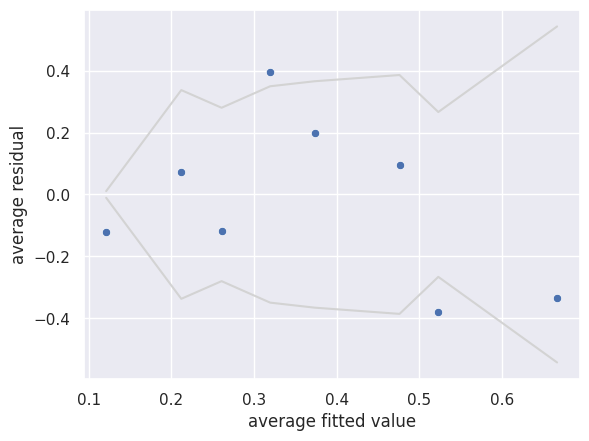

In [421]:
result_hip2.plot_residuals()


## Hipóteses 4: Desenvolvimento tem relação com vazão de pessoas

### C : EXT: DSV, CORE, CONP



2008 - 2012 e países com IDH de 0.7

In [348]:
df_hip4 = df_completo.loc[:, ['Country / territory of asylum/residence', 'Origin', 'decisions_recognized', 'Rejected', 'Year']]
df_hip4 = df_hip4.rename(columns={'Origin': 'origin', 'Country / territory of asylum/residence': 'destiny', 'decisions_recognized': 'value', 'Rejected': 'rejected','Year' : 'year'})
df_hip4

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5,0,2000
1,South Africa,Afghanistan,0,0,2000
2,Uzbekistan,Afghanistan,747,112,2000
3,United States of America,Afghanistan,151,31,2000
4,United States of America,Afghanistan,182,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16,*,2016
129716,United States of America,Zimbabwe,*,*,2016
129717,South Africa,Zimbabwe,NaN,NaN,2016
129718,South Africa,Zimbabwe,73,7869,2016


In [349]:
df_hip4.value = pd.to_numeric(df_hip4['value'], errors = 'coerce').fillna(0)
df_hip4

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5.0,0,2000
1,South Africa,Afghanistan,0.0,0,2000
2,Uzbekistan,Afghanistan,747.0,112,2000
3,United States of America,Afghanistan,151.0,31,2000
4,United States of America,Afghanistan,182.0,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16.0,*,2016
129716,United States of America,Zimbabwe,0.0,*,2016
129717,South Africa,Zimbabwe,0.0,NaN,2016
129718,South Africa,Zimbabwe,73.0,7869,2016


In [350]:
df_hip4_2008_2012 = df_hip4[((df_hip4['year'] == 2008) | (df_hip4['year'] == 2009) | (df_hip4['year'] == 2010) | 
                   (df_hip4['year'] == 2011) | (df_hip4['year'] == 2012))]
df_hip4_2008_2012

,destiny,origin,value,rejected,year
49818,Albania,Afghanistan,0.0,0,2008
49819,Australia,Afghanistan,1.0,1,2008
49820,Australia,Afghanistan,33.0,3,2008
49821,Austria,Afghanistan,486.0,217,2008
49822,Azerbaijan,Afghanistan,0.0,14,2008
...,...,...,...,...,...
88862,Switzerland,Zimbabwe,0.0,1,2012
88863,Costa Rica,Zimbabwe,0.0,0,2012
88864,Cyprus,Zimbabwe,0.0,2,2012
88865,Cyprus,Zimbabwe,0.0,0,2012


In [351]:
df_hip4_2008_2012 = df_hip4_2008_2012.drop('year', axis=1)

In [352]:
df_hip4_2008_2012.value = df_hip4_2008_2012['value'].astype(int)
df_hip4_2008_2012.rejected = df_hip4_2008_2012['rejected'].astype(int)

In [353]:
df_hip4_2008_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39049 entries, 49818 to 88866
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   destiny   39049 non-null  object
 1   origin    39049 non-null  object
 2   value     39049 non-null  int64 
 3   rejected  39049 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [354]:
df_out_degree_2008_2012 = df_hip4_2008_2012.groupby('origin').sum().reindex(listaVertices).fillna(0)
df_out_degree_2008_2012.sort_values("value", ascending = False)

/tmp/ipykernel_84/929537874.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_out_degree_2008_2012 = df_hip4_2008_2012.groupby('origin').sum().reindex(listaVertices).fillna(0)


,value,rejected
origin,,
Eritrea,107682.0,15104.0
Myanmar,107568.0,10132.0
Dem. Rep. of the Congo,77502.0,47213.0
Iraq,71266.0,70812.0
Somalia,70458.0,31261.0
...,...,...
Guadeloupe,0.0,0.0
Liechtenstein,0.0,0.0
Bonaire,0.0,0.0


In [355]:
# Criando um grafo não-dirigido
g2 = Graph(directed=True) 
g2.add_vp('nome')
g2.add_ep('aceitos')

In [356]:
for vertice in listaVertices:
    g2.add_vertex(vertice)

In [357]:
for v in g2.all_vertices():
    v['nome'] = str(v)

In [358]:
n2 = g2.num_vertices()
print('O número de vértices do grafo é :', n2)

O número de vértices do grafo é : 225


In [359]:
df_hip4_2008_2012 = df_hip4_2008_2012[df_hip4_2008_2012['origin'] != df_hip4_2008_2012['destiny']]
df_hip4_2008_2012

,destiny,origin,value,rejected
49818,Albania,Afghanistan,0,0
49819,Australia,Afghanistan,1,1
49820,Australia,Afghanistan,33,3
49821,Austria,Afghanistan,486,217
49822,Azerbaijan,Afghanistan,0,14
...,...,...,...,...
88862,Switzerland,Zimbabwe,0,1
88863,Costa Rica,Zimbabwe,0,0
88864,Cyprus,Zimbabwe,0,2
88865,Cyprus,Zimbabwe,0,0


In [360]:
df_hip4_2008_2012 = df_hip4_2008_2012.groupby(['origin', 'destiny']).sum().reset_index()
df_hip4_2008_2012

,origin,destiny,value,rejected
0,Afghanistan,Albania,0,0
1,Afghanistan,Algeria,2,0
2,Afghanistan,Argentina,1,0
3,Afghanistan,Armenia,0,0
4,Afghanistan,Australia,5990,1542
...,...,...,...,...
7940,Zimbabwe,Ukraine,2,4
7941,Zimbabwe,United Kingdom,6505,14829
7942,Zimbabwe,United States of America,643,344
7943,Zimbabwe,Uruguay,1,0


In [361]:
for index, row in df_hip4_2008_2012.iterrows():
    g2.add_edge(row.origin, row.destiny)
    g2.get_edge(row.origin, row.destiny)['aceitos'] = row.value

In [362]:
gt_save(g2, '/grafo_2008_2012.net.gz')

In [363]:
g2 = gt_load('/grafo_2008_2012.net.gz')

In [364]:
g2 = gt_load('/grafo_2008_2012.net.gz')
m = gt_draw.sfdp_layout(g2)
gt_move(g2, m)
gt_save(g2, 'grafo_2008_2012.net.gz')

In [389]:
#r2 = netpixi.render('grafo_2008_2012.net.gz', infinite=True);

In [368]:
r2.vertex_set_key('nome')

r2.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r2.edge_default(color=0x20B2AA)

In [369]:
r2.edge_scale('aceitos', 1, 10)

In [370]:
g2 =  gt_load('/grafo_2008_2012.net.gz')

In [371]:
m = gt_draw.sfdp_layout(g2)
gt_move(g2, m)
gt_save(g2, 'centralidadeCoreness20082012.net.gz')

In [388]:
#r2 = netpixi.render('centralidadeCoreness20082012.net.gz')

In [373]:
matrix = spectral.adjacency(g2)

# # Além de cpnet.Surprise, há outras
# # opções de algoritmos discretos:
# # cpnet.BE
# # cpnet.Lip
# # cpnet.LapCore
# # cpnet.LapSgnCore
# # cpnet.LowRankCore

algorithm = cpnet.BE()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# # Depois do código acima, c é um dicionário
# # em que as chaves são índices de vértices e
# # valores são os atribuídos pelo algoritmo.

g2.add_vp('coreness')
for i, coreness in c.items():
    v = g2.get_vertex_by_index(i)
    v['coreness'] = int(coreness)
    
# # Vamos pintar de vermelho todos os vértices
# # identificados como centro e de verde todos
# # os vértices identificados como periferia.
    
for v in g2.all_vertices():
    if v['coreness'] == 1:
        r2.vertex(v['id'], color=0xff0000)
    else:
        r2.vertex(v['id'], color=0x00ff00)

# # Quando a execução desta célula terminar,
# # veja como ficou a visualização acima.

In [374]:
r2.edge_scale('aceitos', 1, 10)

r2.vertex_set_key('nome')

r2.vertex_scale('coreness', 5, 25)

In [375]:
df_coreness_2008_2012 = gt_data(g2).sort_values("coreness", ascending = False)
df_coreness_2008_2012

,nome,coreness
id,,
Greece,Greece,1
United States of America,United States of America,1
Serbia and Kosovo (S/RES/1244 (1999)),Serbia and Kosovo (S/RES/1244 (1999)),1
Ireland,Ireland,1
Egypt,Egypt,1
...,...,...
Afghanistan,Afghanistan,0
Turks and Caicos Islands,Turks and Caicos Islands,0
Myanmar,Myanmar,0


In [376]:
r2.vertex_set_key('nome')

r2.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r2.edge_default(color=0x20B2AA)

In [377]:
r2.edge_scale('aceitos', 1, 10)

In [378]:
data_idh_2008_2012 = data.loc[:, ['idh_2008_2012', 'country', 'pop_cont']]

data_idh_2008_2012 = data_idh_2008_2012.rename(columns={'idh_2008_2012': 'idh_2008_2012', 'country': 'origin'})
df_coreness_2008_2012 = df_coreness_2008_2012.rename(columns={'nome':'origin'})

df_coreness_2008_2012

,origin,coreness
id,,
Greece,Greece,1
United States of America,United States of America,1
Serbia and Kosovo (S/RES/1244 (1999)),Serbia and Kosovo (S/RES/1244 (1999)),1
Ireland,Ireland,1
Egypt,Egypt,1
...,...,...
Afghanistan,Afghanistan,0
Turks and Caicos Islands,Turks and Caicos Islands,0
Myanmar,Myanmar,0


In [379]:
df_intermediario = df_coreness_2008_2012.merge(data_idh_2008_2012, on="origin", how="left")
df_intermediario

,origin,coreness,idh_2008_2012,pop_cont
0,Greece,1,0.8648,0
1,United States of America,1,0.9156,0
2,Serbia and Kosovo (S/RES/1244 (1999)),1,0.7694,0
3,Ireland,1,0.9056,0
4,Egypt,1,0.6676,0
...,...,...,...,...
220,Afghanistan,0,0.4690,0
221,Turks and Caicos Islands,0,0.8730,0
222,Myanmar,0,0.5142,1
223,Iraq,0,0.6372,1


In [380]:
df_intermediario = df_intermediario.merge(df_out_degree, on="origin", how="left")
df_intermediario

,origin,coreness,idh_2008_2012,pop_cont,value,rejected
0,Greece,1,0.8648,0,10.0,96.0
1,United States of America,1,0.9156,0,50.0,2765.0
2,Serbia and Kosovo (S/RES/1244 (1999)),1,0.7694,0,5801.0,96650.0
3,Ireland,1,0.9056,0,1.0,24.0
4,Egypt,1,0.6676,0,5581.0,8799.0
...,...,...,...,...,...,...
220,Afghanistan,0,0.4690,0,42674.0,77642.0
221,Turks and Caicos Islands,0,0.8730,0,2.0,2.0
222,Myanmar,0,0.5142,1,107568.0,10132.0
223,Iraq,0,0.6372,1,71266.0,70812.0


In [381]:
df_filtrado_idh_2008_2012 =  df_intermediario[(df_intermediario['idh_2008_2012'] > 0.7)]
df_filtrado_idh_2008_2012

,origin,coreness,idh_2008_2012,pop_cont,value,rejected
0,Greece,1,0.8648,0,10.0,96.0
1,United States of America,1,0.9156,0,50.0,2765.0
2,Serbia and Kosovo (S/RES/1244 (1999)),1,0.7694,0,5801.0,96650.0
3,Ireland,1,0.9056,0,1.0,24.0
6,France,1,0.8794,0,14.0,139.0
...,...,...,...,...,...,...
210,Gibraltar,0,0.9610,0,1.0,0.0
211,Bosnia and Herzegovina,0,0.7302,0,488.0,10876.0
214,Montserrat,0,0.8210,0,0.0,0.0
221,Turks and Caicos Islands,0,0.8730,0,2.0,2.0


In [382]:
result_hip4 = reg.linear(data=df_filtrado_idh_2008_2012, formula='np.log1p(value) ~ idh_2008_2012 + coreness + pop_cont')
result_hip4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log1p(value)   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     42.37
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.30e-18
Time:                        22:52:06   Log-Likelihood:                -254.20
No. Observations:                 121   AIC:                             516.4
Df Residuals:                     117   BIC:                             527.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        24.9645      2.204     11.328      0.000      20.600      29.329
idh_2008_2012   -27.2029      2.707    -10.049      0.000     -32.564     -21.842
coreness          1.7338      0.382      4.537      0.000       0.977       2.491
pop_cont          2.1168      0.605      3.499      0.001       0.919       3.315
==============================================================================
Omnibus:                        1.383   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.459
Skew:                           0.238   Prob(JB):                        0.482
Kurtosis:                       2.750   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [383]:
result_hip4.nano_summary()

-27.203 (2.707) ***
+01.734 (0.382) ***
+02.117 (0.605) ***


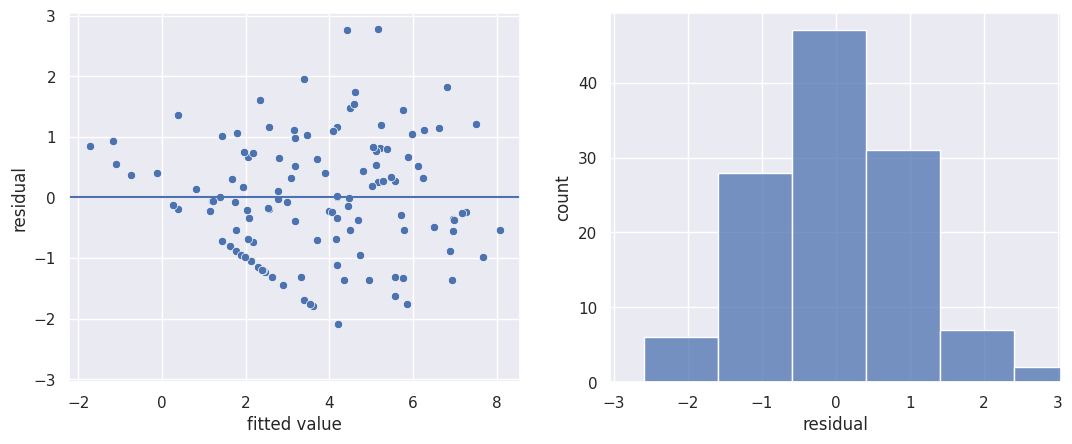

In [384]:
result_hip4.plot_residuals()


## Hipótese 3: Localização tem relação com intermediação

### G : BW: GEO

2001 - 2003 e países com IDH maior que 0.7

In [385]:
df_aresta_2001_2003

,origin,destiny,value,rejected
0,Afghanistan,Angola,0,2
1,Afghanistan,Argentina,0,0
2,Afghanistan,Armenia,0,4
3,Afghanistan,Australia,2192,757
4,Afghanistan,Austria,1034,811
...,...,...,...,...
5845,Zimbabwe,Switzerland,0,17
5846,Zimbabwe,Thailand,0,0
5847,Zimbabwe,Ukraine,0,3
5848,Zimbabwe,United Kingdom,5490,12256


In [386]:
g3 =  gt_load('/grafo_2001_2003.net.gz')

In [387]:
m = gt_draw.sfdp_layout(g3)
gt_move(g3, m)
gt_save(g3, 'grafo_2001_2003.net.gz')

In [409]:
#r3 = netpixi.render('grafo_2001_2003.net.gz', infinite=True);

In [391]:
r3.vertex_set_key('nome')

r3.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r3.edge_default(color=0x20B2AA)

r3.edge_scale('aceitos', 1, 10)

In [392]:
bc_completo, _ = centrality.betweenness(g3)
g3.add_vp('betweenness', bc_completo)

In [393]:
df_betweenness_2001_2003 = gt_data(g3).sort_values("betweenness", ascending = False)
df_betweenness_2001_2003

,nome,betweenness
id,,
United States of America,United States of America,0.105584
China,China,0.073186
Kenya,Kenya,0.035235
Australia,Australia,0.033659
Spain,Spain,0.027726
...,...,...
Barbados,Barbados,0.000000
Bhutan,Bhutan,0.000000
Samoa,Samoa,0.000000


In [394]:
m = gt_draw.sfdp_layout(g3)
gt_move(g3, m)
gt_save(g3, 'centralidadeBetweeness20012003.net.gz')

In [395]:
r.vertex_scale('betweenness', 5, 25)

In [408]:
#r3 = netpixi.render('centralidadeBetweeness20012003.net.gz', infinite=True);

In [397]:
r3.edge_scale('aceitos', 1, 10)

r3.vertex_set_key('nome')

r3.vertex_scale('betweenness', 5, 25)

In [398]:
data_idh_2001_2003 = data.loc[:, ['idh_2001_2003', 'country', 'n_neightbours']]
data_idh_2001_2003

,idh_2001_2003,country,n_neightbours
0,0.845667,"China, Hong Kong SAR",1
1,0.922000,"China, Macao SAR",1
2,0.376667,Afghanistan,6
3,0.684333,Albania,4
4,0.657000,Algeria,7
...,...,...,...
220,0.763000,Wallis and Futuna Islands,0
221,0.000000,Western Sahara,3
222,0.461333,Yemen,2
223,0.441333,Zambia,8


In [399]:
data_idh_2001_2003 = data_idh_2001_2003.rename(columns={'idh_2001_2003': 'idh_2001_2003', 'country': 'origin'})
df_betweenness_2001_2003 = df_betweenness_2001_2003.rename(columns={'nome':'origin'})
df_betweenness_2001_2003

,origin,betweenness
id,,
United States of America,United States of America,0.105584
China,China,0.073186
Kenya,Kenya,0.035235
Australia,Australia,0.033659
Spain,Spain,0.027726
...,...,...
Barbados,Barbados,0.000000
Bhutan,Bhutan,0.000000
Samoa,Samoa,0.000000


In [400]:
df_betweenness_2001_2003 = df_betweenness_2001_2003.merge(data_idh_2001_2003, on="origin", how="left")
df_betweenness_2001_2003

,origin,betweenness,idh_2001_2003,n_neightbours
0,United States of America,0.105584,0.891333,2
1,China,0.073186,0.606667,16
2,Kenya,0.035235,0.469333,5
3,Australia,0.033659,0.907000,0
4,Spain,0.027726,0.837333,5
...,...,...,...,...
220,Barbados,0.000000,0.774000,0
221,Bhutan,0.000000,0.000000,2
222,Samoa,0.000000,0.661000,0
223,Comoros,0.000000,0.475333,0


In [401]:
df_filtrado_idh_2001_2003 =  df_betweenness_2001_2003[(df_betweenness_2001_2003['idh_2001_2003'] > 0.7)]
df_filtrado_idh_2001_2003

,origin,betweenness,idh_2001_2003,n_neightbours
0,United States of America,0.105584,0.891333,2
3,Australia,0.033659,0.907000,0
4,Spain,0.027726,0.837333,5
5,Russian Federation,0.025644,0.734667,14
8,Romania,0.020640,0.730667,5
...,...,...,...,...
209,Iceland,0.000000,0.880000,0
210,Wallis and Futuna Islands,0.000000,0.763000,0
212,Malta,0.000000,0.805000,0
219,Bonaire,0.000000,0.833000,0


In [403]:
result_hip3 = reg.linear(data=df_filtrado_idh_2001_2003, formula='betweenness ~ n_neightbours')
result_hip3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            betweenness   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.682
Date:                Wed, 09 Nov 2022   Prob (F-statistic):              0.105
Time:                        22:54:28   Log-Likelihood:                 275.00
No. Observations:                  92   AIC:                            -546.0
Df Residuals:                      90   BIC:                            -540.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0026      0.002      1.527      0.130      -0.001       0.006
n_neightbours     0.0008      0.000      1.638      0.105      -0.000       0.002
==============================================================================
Omnibus:                      160.200   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10197.199
Skew:                           6.554   Prob(JB):                         0.00
Kurtosis:                      52.883   Cond. No.                         5.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [404]:
result_hip3.nano_summary()

+0.001 (0.000)



## Hipóteses 5: Abertura tem relação com chegada de pessoas

### H : IN: OPEN, EXT, CORE


2008 - 2012 e países da África

In [405]:
df_indegree_2008_2012  = df_hip4_2008_2012.groupby('destiny').sum().reindex(listaVertices).fillna(0)
df_indegree_2008_2012 = df_indegree_2008_2012.sort_values("value", ascending = False)
df_indegree_2008_2012 = df_indegree_2008_2012.reset_index()
df_indegree_2008_2012 = df_indegree_2008_2012.rename(columns={'destiny': 'country', 'value':'in_degree'})
df_indegree_2008_2012

/tmp/ipykernel_84/3417367393.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_indegree_2008_2012  = df_hip4_2008_2012.groupby('destiny').sum().reindex(listaVertices).fillna(0)


,country,in_degree,rejected
0,United States of America,104356.0,74546.0
1,Malaysia,93752.0,4685.0
2,France,54791.0,267437.0
3,Canada,54290.0,60789.0
4,Sudan,51213.0,845.0
...,...,...,...
220,Barbados,0.0,0.0
221,Bhutan,0.0,0.0
222,Timor-Leste,0.0,3.0
223,Montserrat,0.0,0.0


In [406]:
df_intermediario = df_intermediario.drop('rejected', axis=1)

In [407]:
df_intermediario = df_intermediario.rename(columns={'origin': 'country', 'value':'out_degree'})
df_intermediario = df_intermediario.merge(df_indegree_2008_2012, on="country", how="left")
df_intermediario

,country,coreness,idh_2008_2012,pop_cont,out_degree,in_degree,rejected
0,Greece,1,0.8648,0,10.0,905.0,63158.0
1,United States of America,1,0.9156,0,50.0,104356.0,74546.0
2,Serbia and Kosovo (S/RES/1244 (1999)),1,0.7694,0,5801.0,0.0,331.0
3,Ireland,1,0.9056,0,1.0,1348.0,20082.0
4,Egypt,1,0.6676,0,5581.0,7406.0,3197.0
...,...,...,...,...,...,...,...
220,Afghanistan,0,0.4690,0,42674.0,52.0,18.0
221,Turks and Caicos Islands,0,0.8730,0,2.0,0.0,5.0
222,Myanmar,0,0.5142,1,107568.0,0.0,0.0
223,Iraq,0,0.6372,1,71266.0,147.0,5.0


In [410]:
df_2008_2012_inout = df_intermediario.drop(['pop_cont','idh_2008_2012'], axis=1)
df_2008_2012_inout

,country,coreness,out_degree,in_degree,rejected
0,Greece,1,10.0,905.0,63158.0
1,United States of America,1,50.0,104356.0,74546.0
2,Serbia and Kosovo (S/RES/1244 (1999)),1,5801.0,0.0,331.0
3,Ireland,1,1.0,1348.0,20082.0
4,Egypt,1,5581.0,7406.0,3197.0
...,...,...,...,...,...
220,Afghanistan,0,42674.0,52.0,18.0
221,Turks and Caicos Islands,0,2.0,0.0,5.0
222,Myanmar,0,107568.0,0.0,0.0
223,Iraq,0,71266.0,147.0,5.0


In [411]:
df_2008_2012_inout['open'] = (df_2008_2012_inout['in_degree']/(df_2008_2012_inout['in_degree'] + df_2008_2012_inout['rejected']))*100
df_2008_2012_inout['open'] = df_2008_2012_inout['open'].fillna(0)
df_2008_2012_inout

,country,coreness,out_degree,in_degree,rejected,open
0,Greece,1,10.0,905.0,63158.0,1.412672
1,United States of America,1,50.0,104356.0,74546.0,58.331377
2,Serbia and Kosovo (S/RES/1244 (1999)),1,5801.0,0.0,331.0,0.000000
3,Ireland,1,1.0,1348.0,20082.0,6.290247
4,Egypt,1,5581.0,7406.0,3197.0,69.848156
...,...,...,...,...,...,...
220,Afghanistan,0,42674.0,52.0,18.0,74.285714
221,Turks and Caicos Islands,0,2.0,0.0,5.0,0.000000
222,Myanmar,0,107568.0,0.0,0.0,0.000000
223,Iraq,0,71266.0,147.0,5.0,96.710526


In [412]:
df_2008_2012_inout_africa =  df_2008_2012_inout[(df_2008_2012_inout['country'].isin(lista_paises_africa))]
df_2008_2012_inout_africa

,country,coreness,out_degree,in_degree,rejected,open
4,Egypt,1,5581.0,7406.0,3197.0,69.848156
8,Mauritania,1,1852.0,230.0,606.0,27.511962
13,Côte d'Ivoire,1,12827.0,159.0,940.0,14.467698
17,Ghana,1,440.0,9363.0,148.0,98.443907
18,Senegal,1,830.0,32.0,455.0,6.570842
28,South Africa,1,131.0,36451.0,309145.0,10.547286
32,Libya,1,952.0,5328.0,340.0,94.001411
35,Angola,1,1049.0,1590.0,765.0,67.515924
41,Sudan,1,24449.0,51213.0,845.0,98.376810
43,Benin,1,89.0,508.0,1331.0,27.623709


In [416]:
result_hip5 = reg.linear(data=df_2008_2012_inout_africa, formula='np.log1p(in_degree) ~ open + coreness + out_degree')
result_hip5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log1p(in_degree)   R-squared:                       0.680
Model:                             OLS   Adj. R-squared:                  0.660
Method:                  Least Squares   F-statistic:                     33.99
Date:                 Wed, 09 Nov 2022   Prob (F-statistic):           6.24e-12
Time:                         22:55:37   Log-Likelihood:                -106.77
No. Observations:                   52   AIC:                             221.5
Df Residuals:                       48   BIC:                             229.3
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4109      0.504      2.799      0.007       0.398       2.424
open           0.0677      0.007      9.062      0.000       0.053       0.083
coreness       2.8579      0.618      4.626      0.000       1.616       4.100
out_degree  3.751e-06   1.33e-05      0.282      0.780    -2.3e-05    3.05e-05
==============================================================================
Omnibus:                        4.084   Durbin-Watson:                   2.470
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                4.346
Skew:                          -0.071   Prob(JB):                        0.114
Kurtosis:                       4.409   Cond. No.                     5.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [417]:
result_hip5.nano_summary()

+0.068 (0.007) ***
+2.858 (0.618) ***
+0.000 (0.000)


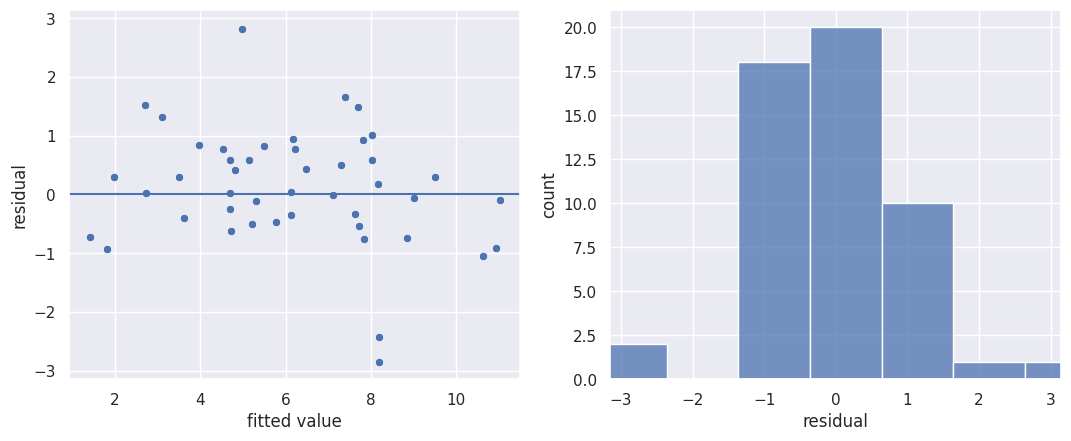

In [418]:
result_hip5.plot_residuals()